## **Predictive Analysis of Hospital Resource Utilization During the COVID-19 Pandemic**

This project aims to leverage historical data on hospital resource utilization during the COVID-19 pandemic to predict and manage various aspects of healthcare needs effectively. By analyzing data across multiple states, this initiative focuses on:

1. Hospital Capacity Needs Prediction: This involves forecasting the need for hospital beds specifically allocated for COVID-19 patients, helping hospitals prepare for future demands.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('hospital.csv')
df.head(10)

,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
0,2020-03-24,Johor,1440,434,1408,0,0,0,0,0,0,18,9,1
1,2020-03-24,Kedah,1218,143,1183,0,0,0,0,0,0,46,5,12
2,2020-03-24,Kelantan,1463,280,1424,9,6,15,1,0,1,78,58,23
3,2020-03-24,Melaka,1091,82,1065,0,0,0,0,0,0,19,10,12
4,2020-03-24,Negeri Sembilan,1223,253,1205,0,0,0,0,0,0,90,13,8
5,2020-03-24,Pahang,851,87,830,0,0,0,0,0,0,36,14,14
6,2020-03-24,Perak,1706,211,1667,0,0,0,0,1,1,78,40,6
7,2020-03-24,Perlis,508,12,495,0,0,0,0,0,0,7,8,8
8,2020-03-24,Pulau Pinang,1158,86,1132,0,0,0,0,0,0,68,2,8
9,2020-03-24,Sabah,2598,605,2528,0,0,0,0,0,0,161,46,35


## EDA & Preprocessing

In [ ]:
df.describe()

,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
count,27590.00000,27590.000000,27590.000000,27590.000000,27590.000000,27590.000000,27590.000000,27590.000000,27590.000000,27590.000000,27590.000000,27590.000000
mean,2293.76680,392.422943,2205.523378,12.154585,22.605473,34.760058,9.607829,19.236426,28.844255,117.556325,26.915440,1368.089851
std,1469.28445,445.984115,1418.682484,29.156945,53.445584,74.431827,21.736345,47.098217,62.121264,277.041656,62.556293,939.461367
min,122.00000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1251.00000,91.000000,1209.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,705.000000
50%,2099.00000,251.000000,2005.000000,1.000000,3.000000,7.000000,1.000000,3.000000,6.000000,16.000000,2.000000,1179.000000
75%,3171.00000,508.000000,3075.000000,9.000000,19.000000,32.000000,7.000000,16.000000,28.000000,102.000000,23.000000,1971.000000
max,6568.00000,4713.000000,6224.000000,451.000000,789.000000,914.000000,236.000000,658.000000,732.000000,4218.000000,992.000000,13131.000000


In [ ]:
df.isna().sum()

,0
date,0
state,0
beds,0
beds_covid,0
beds_noncrit,0
admitted_pui,0
admitted_covid,0
admitted_total,0
discharged_pui,0
discharged_covid,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27590 entries, 0 to 27589
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              27590 non-null  object
 1   state             27590 non-null  object
 2   beds              27590 non-null  int64 
 3   beds_covid        27590 non-null  int64 
 4   beds_noncrit      27590 non-null  int64 
 5   admitted_pui      27590 non-null  int64 
 6   admitted_covid    27590 non-null  int64 
 7   admitted_total    27590 non-null  int64 
 8   discharged_pui    27590 non-null  int64 
 9   discharged_covid  27590 non-null  int64 
 10  discharged_total  27590 non-null  int64 
 11  hosp_covid        27590 non-null  int64 
 12  hosp_pui          27590 non-null  int64 
 13  hosp_noncovid     27590 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 2.9+ MB


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.date.unique()

<DatetimeArray>
['2020-03-24 00:00:00', '2020-03-25 00:00:00', '2020-03-26 00:00:00',
 '2020-03-27 00:00:00', '2020-03-28 00:00:00', '2020-03-29 00:00:00',
 '2020-03-30 00:00:00', '2020-03-31 00:00:00', '2020-04-01 00:00:00',
 '2020-04-02 00:00:00',
 ...
 '2025-01-02 00:00:00', '2025-01-03 00:00:00', '2025-01-04 00:00:00',
 '2025-01-05 00:00:00', '2025-01-06 00:00:00', '2025-01-07 00:00:00',
 '2025-01-08 00:00:00', '2025-01-09 00:00:00', '2025-01-10 00:00:00',
 '2025-01-11 00:00:00']
Length: 1751, dtype: datetime64[ns]

In [ ]:
#exploring categotical data
df.select_dtypes(['object']).describe()

,state
count,27590
unique,16
top,Johor
freq,1751


In [ ]:
#check values of each categorical attribute
cat_attributes = df.select_dtypes(['object']).columns
for i in cat_attributes:
  values = df[i].unique().tolist()
  print(i,': ',values)

state :  ['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan', 'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak', 'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan', 'W.P. Putrajaya']


In [ ]:
#check cases counts for each state
state_counts = df['state'].value_counts()
state_counts

,count
state,
Johor,1751
Kedah,1751
Kelantan,1751
Melaka,1751
Negeri Sembilan,1751
Pahang,1751
Perak,1751
Pulau Pinang,1751
Sabah,1751


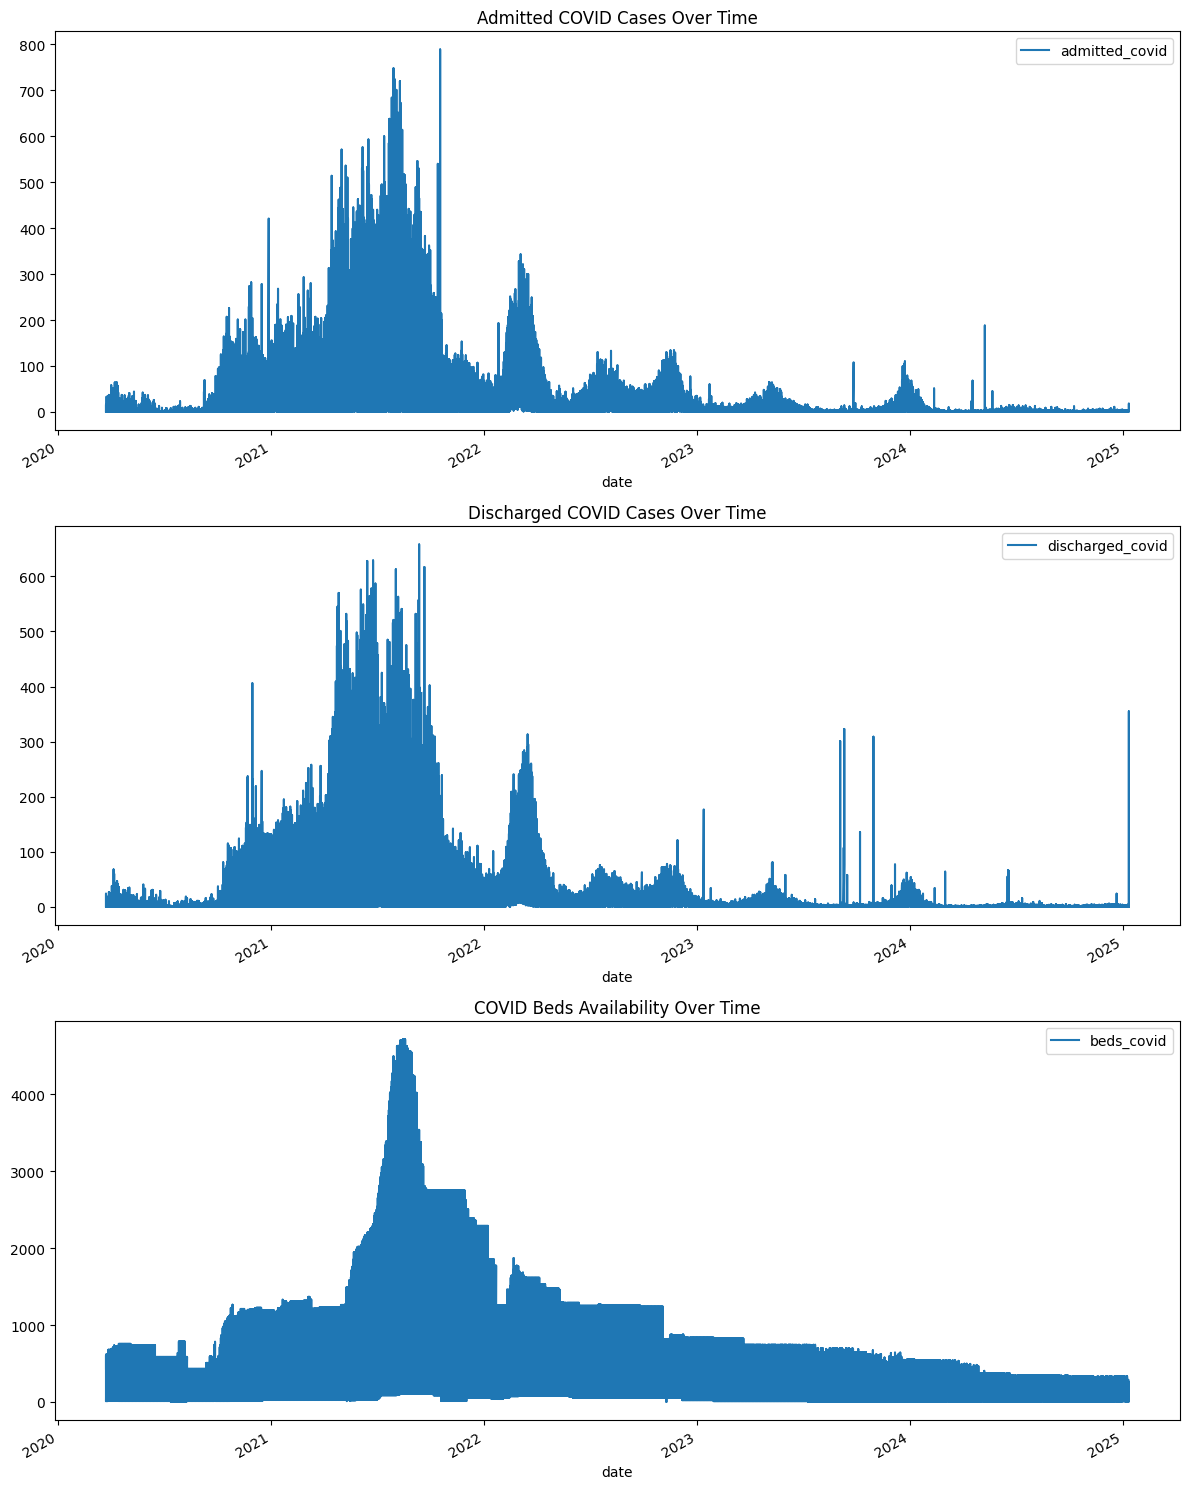

In [ ]:
# Plotting trends for COVID-related cases and beds
fig, ax = plt.subplots(3, 1, figsize=(12, 15))
df.plot(x='date', y='admitted_covid', ax=ax[0], title='Admitted COVID Cases Over Time')
df.plot(x='date', y='discharged_covid', ax=ax[1], title='Discharged COVID Cases Over Time')
df.plot(x='date', y='beds_covid', ax=ax[2], title='COVID Beds Availability Over Time')
plt.tight_layout()
plt.show()

- Admitted COVID Cases Over Time : Major peaks around mid-2021 and early 2022 suggest significant outbreaks.

- Discharged COVID Cases Over Time : Discharge rates show peaks that generally align with the admission rates, reflecting the hospital stay duration and recovery rates. Peaks in discharges shortly after peaks in admissions indicate recovery or release of patients as they recuperate.

- COVID Beds Availability Over Time : A significant spike in the availability of COVID beds in mid-2021, which gradually declines thereafter. The sharp increase in bed availability likely represents a response to the surge in cases, where hospitals expanded capacity to accommodate more patients.

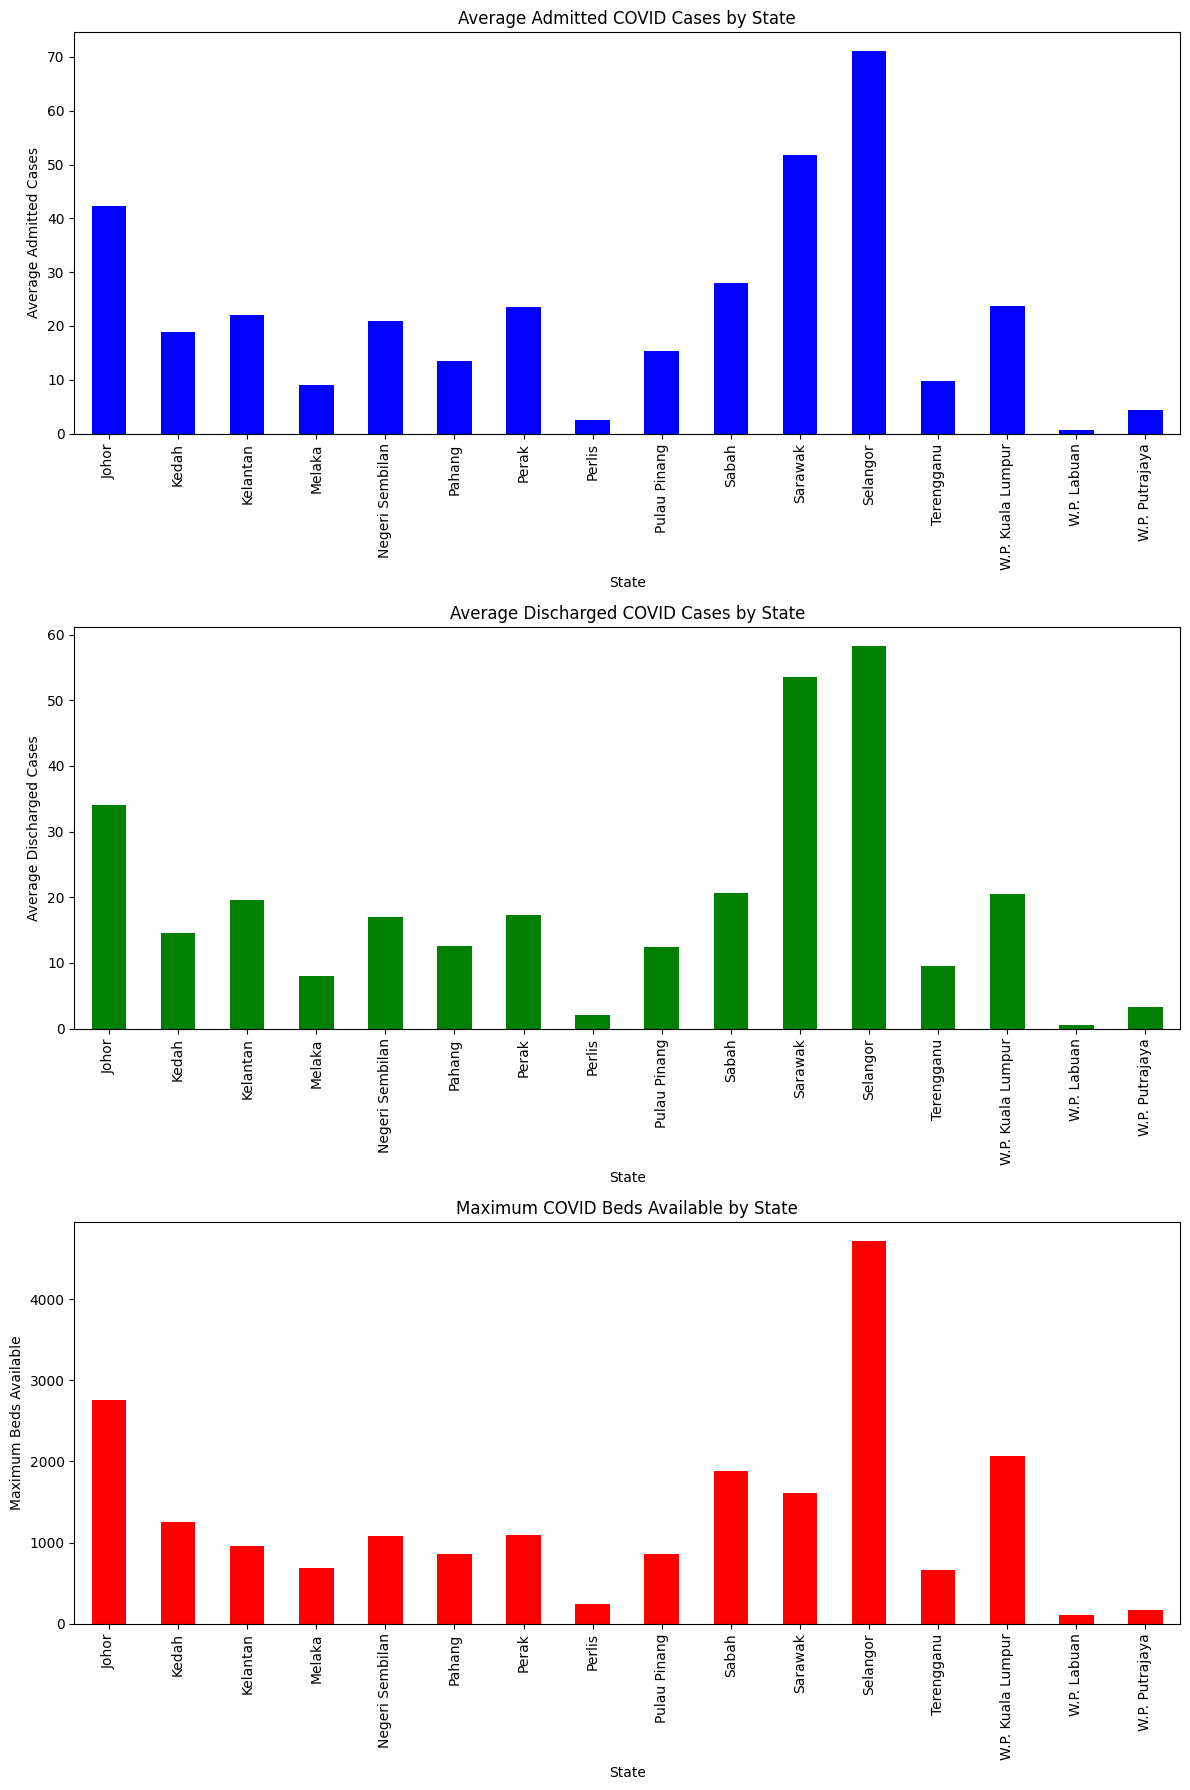

In [ ]:

# Group by state and calculate mean for admitted and discharged, and max for beds
statewise_stats = df.groupby('state').agg({
    'admitted_covid': 'mean',
    'discharged_covid': 'mean',
    'beds_covid': 'max'
})

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plotting admitted COVID cases by state
statewise_stats['admitted_covid'].plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Average Admitted COVID Cases by State')
axes[0].set_ylabel('Average Admitted Cases')
axes[0].set_xlabel('State')

# Plotting discharged COVID cases by state
statewise_stats['discharged_covid'].plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Average Discharged COVID Cases by State')
axes[1].set_ylabel('Average Discharged Cases')
axes[1].set_xlabel('State')

# Plotting COVID beds available by state
statewise_stats['beds_covid'].plot(kind='bar', ax=axes[2], color='red')
axes[2].set_title('Maximum COVID Beds Available by State')
axes[2].set_ylabel('Maximum Beds Available')
axes[2].set_xlabel('State')

plt.tight_layout()
plt.show()


- States like Selangor and Sabah show the highest average number of admitted COVID cases, indicating they were more heavily affected or had larger outbreaks.
- States with higher admissions like Selangor and Sabah also show high discharge rates, which may indicate effective throughput and recovery rates in these regions.
- Selangor shows a significantly higher capacity for COVID beds, which aligns with its higher number of cases.

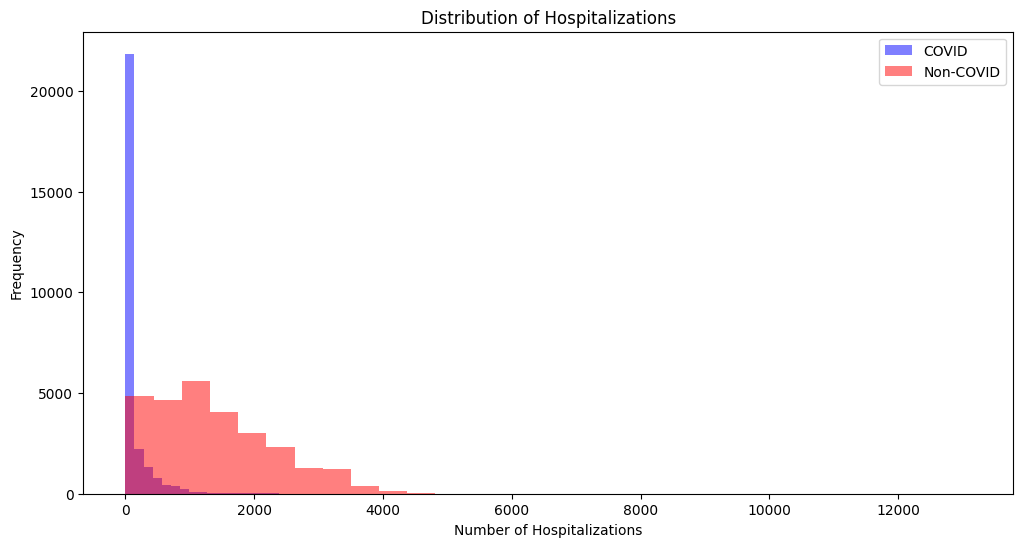

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['hosp_covid'], bins=30, alpha=0.5, label='COVID', color='blue')
plt.hist(df['hosp_noncovid'], bins=30, alpha=0.5, label='Non-COVID', color='red')
plt.title('Distribution of Hospitalizations')
plt.xlabel('Number of Hospitalizations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- Predominance of Non-COVID Cases: Non-COVID hospitalizations show a wider and more frequent distribution, indicating a greater variability and higher overall hospitalization rates compared to COVID cases.
-Concentration of COVID Cases: COVID hospitalizations are primarily concentrated at lower numbers, suggesting fewer hospital stays specifically due to COVID.
- Distribution Shape: Both distributions are skewed to the right, with non-COVID cases showing a more pronounced tail, suggesting occasional very high hospitalization numbers.


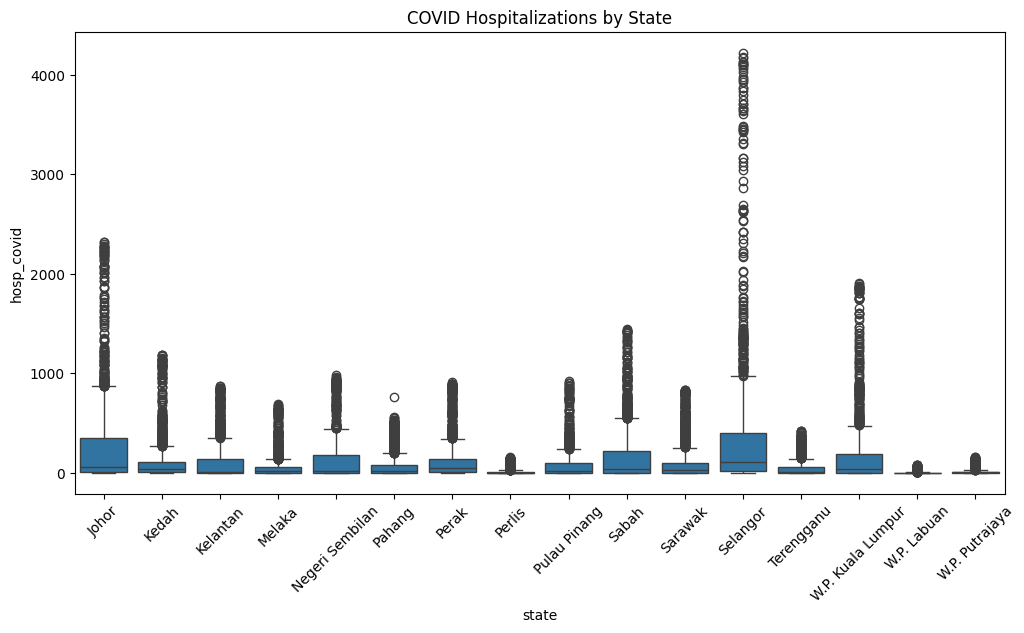

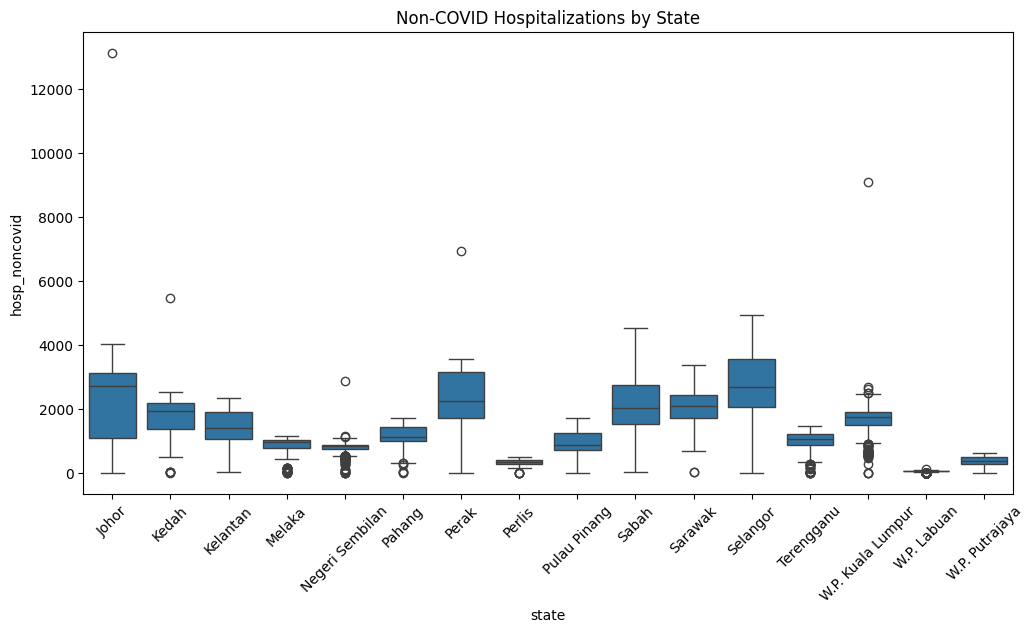

In [ ]:
# hospitalizations by state
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='hosp_covid', data=df)
plt.title('COVID Hospitalizations by State')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='hosp_noncovid', data=df)
plt.title('Non-COVID Hospitalizations by State')
plt.xticks(rotation=45)
plt.show()

Covid hospitalizations :
- High Variability: States like Selangor, Sabah, and Johor show a high range of COVID hospitalizations, indicating significant fluctuations over time.
- Outliers: Several states have outlier points, suggesting occasional spikes in hospitalizations that are far higher than typical values.
- Comparative Analysis: Comparing the medians, it's evident that certain states like Selangor and Johor had consistently higher median COVID hospitalizations, likely due to higher population densities or case rates.

Non-Covid Hospitalizations :  
- Lower Variability: Non-COVID hospitalizations appear generally more consistent across time than COVID-related ones, with narrower interquartile ranges.
- Distribution: States like Johor, Kedah, and Selangor again show higher medians, indicating a substantial demand on healthcare resources regardless of COVID.
- Low Hospitalizations: States such as WP Labuan and Putrajaya show very low numbers of non-COVID hospitalizations, which could be attributed to smaller populations or better health outcomes.


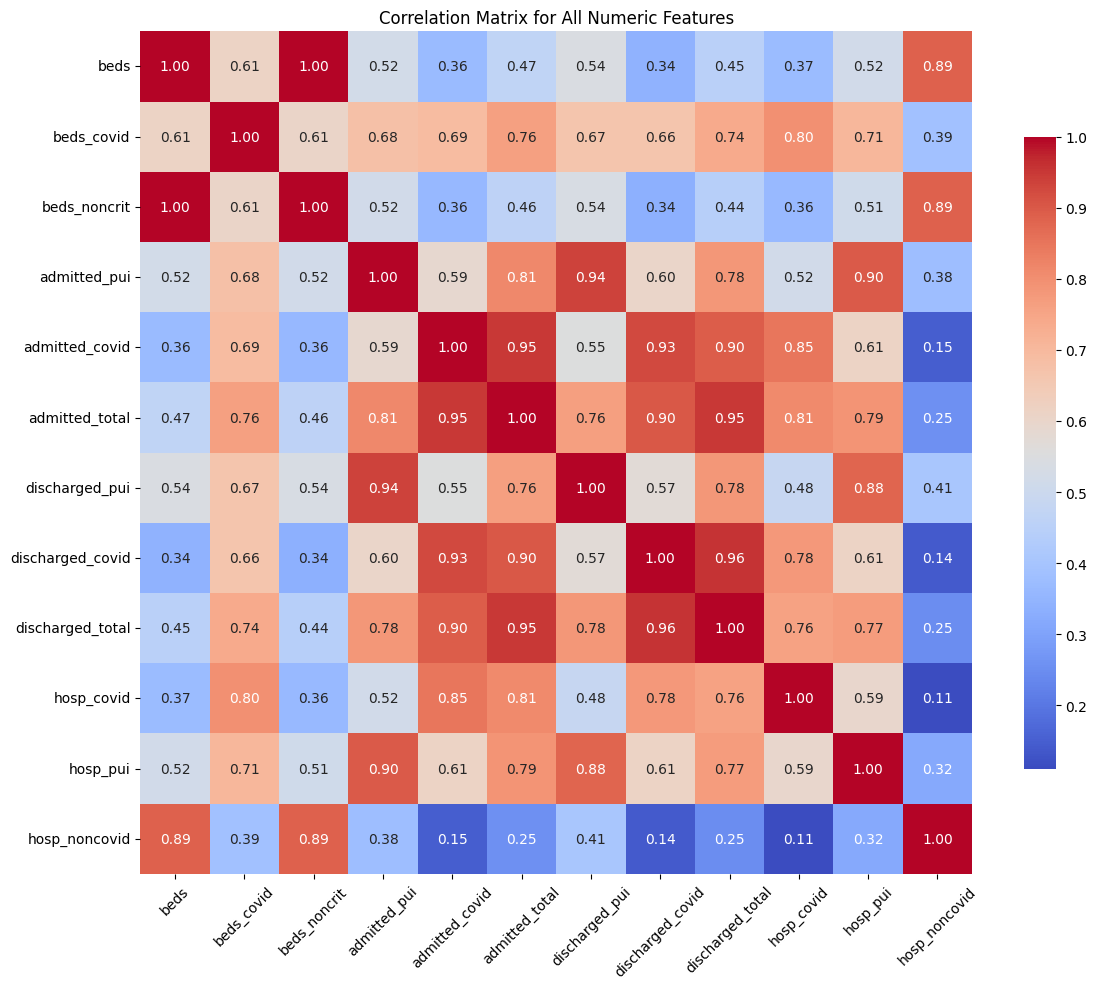

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .75})
plt.title('Correlation Matrix for All Numeric Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

1. High Correlation Between Admissions and Discharges: There is a strong correlation between the number of admitted patients (admitted_total) and discharged patients (discharged_total). This indicates a high turnover rate, which implies that as more patients are admitted, a proportional number are discharged, keeping the hospital flow dynamic.

2. Correlation Between Hospitalizations and Bed Availability: There is a significant correlation between hosp_covid and beds_covid. This suggests that as COVID-19 hospitalizations increase, the demand for COVID-19 specific beds rises, which is expected during a pandemic scenario. The same trend is visible with hosp_noncovid and beds, highlighting how hospitalization rates depend directly on bed availability for both COVID and non-COVID cases.

3. Admissions and Hospital Capacity: The correlation between admitted_covid and hosp_covid is strong, which indicates that most COVID-19 admissions result in hospitalizations rather than being sent home or isolated elsewhere. This correlation points to the severity of cases that require medical attention in hospitals.

In [ ]:
#drop _pui columns as we will focus on confirmed cases only
pui_columns = [col for col in df.columns if col.endswith('_pui')]
df.drop(columns=pui_columns, inplace=True)

(seperate df from prediction 4 (dff & df2))

In [ ]:
dff = df.copy()

## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

num_cols = ['beds', 'beds_covid', 'beds_noncrit', 'admitted_covid', 'admitted_total', 'discharged_covid', 'discharged_total', 'hosp_covid', 'hosp_noncovid']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'], index=df.index)
df = pd.concat([df, pca_df], axis=1)


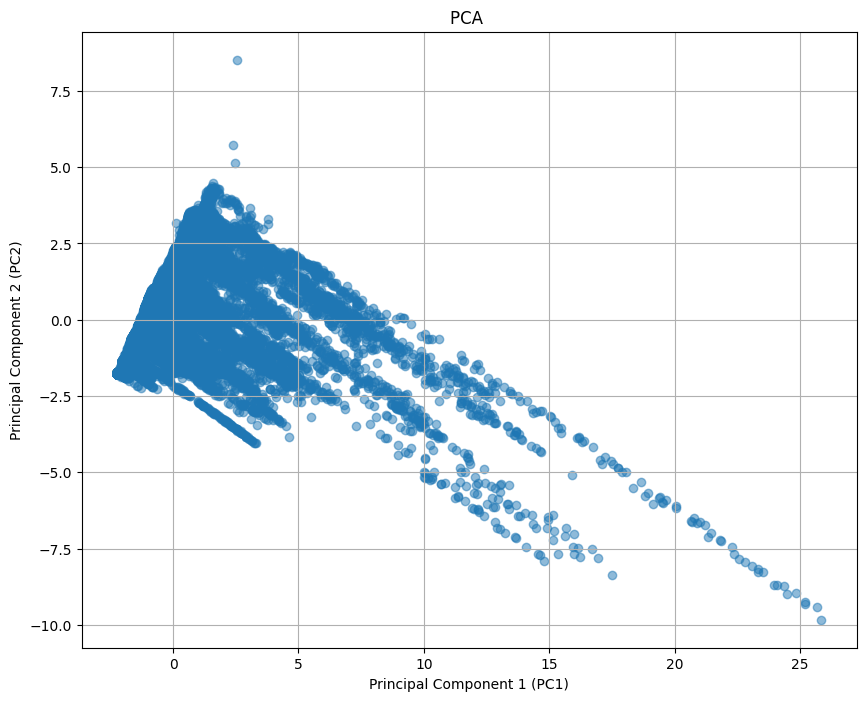

Explained variance by each component: [0.65979372 0.24451787]
Cumulative variance explained by the first 2 components: [0.65979372 0.90431159]


In [ ]:
# visualising PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['PC1'], df['PC2'], alpha=0.5)
plt.title('PCA ')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()

# Print explained variance
print("Explained variance by each component:", pca.explained_variance_ratio_)
print("Cumulative variance explained by the first 2 components:", pca.explained_variance_ratio_.cumsum())

- The first two components explain 90.43% of the total variance in the dataset, which indicates that these two components effectively represent the majority of the essential information in the original data with reduced dimensions.



## 1. Predicting Hospital Capacity Needs for Covid cases by State


Since Selangor has the highest rate of admitted covid patients, we will focus on predicting hospital capacity needs (bed capacity) for the Selangor state only.

In [ ]:
df.head()

,date,state,beds,beds_covid,beds_noncrit,admitted_covid,admitted_total,discharged_covid,discharged_total,hosp_covid,hosp_noncovid,PC1,PC2
0,2020-03-24,Johor,1440,434,1408,0,0,0,0,18,1,-1.359709,-0.907808
1,2020-03-24,Kedah,1218,143,1183,0,0,0,0,46,12,-1.643221,-1.084140
2,2020-03-24,Kelantan,1463,280,1424,6,15,0,1,78,23,-1.271242,-1.000866
3,2020-03-24,Melaka,1091,82,1065,0,0,0,0,19,12,-1.773847,-1.146997
4,2020-03-24,Negeri Sembilan,1223,253,1205,0,0,0,0,90,8,-1.495974,-1.106276


In [ ]:

#filtering for selangor data
df1 = df[df['state'] == 'Selangor']

#target variable
#capacity = 1 if hosp_covid / beds_covid > 0.80 (Overcapacity).
#capacity = 0 otherwise (Normal capacity).
df1.loc[:, 'capacity_label'] = (df1['hosp_covid'] / df1['beds_covid'] > 0.80).astype(int)


<ipython-input-22-207855cf972d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'capacity_label'] = (df1['hosp_covid'] / df1['beds_covid'] > 0.80).astype(int)


In [ ]:
df1

,date,state,beds,beds_covid,beds_noncrit,admitted_covid,admitted_total,discharged_covid,discharged_total,hosp_covid,hosp_noncovid,PC1,PC2,capacity_label
11,2020-03-24,Selangor,887,504,783,16,21,24,24,261,184,-0.648075,-1.693543,0
26,2020-03-25,Selangor,845,476,741,33,40,6,6,281,73,-0.717551,-1.778346,0
41,2020-03-26,Selangor,845,476,741,23,31,13,27,283,144,-0.634090,-1.768126,0
56,2020-03-27,Selangor,845,476,741,28,35,8,14,281,66,-0.715216,-1.781357,0
71,2020-03-28,Selangor,845,476,741,35,53,19,22,289,55,-0.434267,-1.950491,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27521,2025-01-07,Selangor,4789,334,4672,0,30,1,32,5,2783,0.788801,2.769194,0
27537,2025-01-08,Selangor,4098,330,3996,4,28,1,23,8,2855,0.497640,2.370050,0
27553,2025-01-09,Selangor,2694,180,2625,1,32,1,32,6,1391,-0.424581,0.556570,0
27569,2025-01-10,Selangor,3870,204,3773,1,34,2,32,5,1816,0.158456,1.568385,0


With PCA

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df1[['PC1', 'PC2']]
y = df1['capacity_label']

#stratified K-Fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=3, max_features='sqrt')
}

training_results = {}
testing_results = {}

#perform cross-validation
for name, model in models.items():

    train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1-score': []}
    test_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1-score': []}

    for train_index, test_index in kfold.split(X, y):
        #split data for the current fold
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        #apply SMOTE on the training fold only
        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

        model.fit(X_train_smote, y_train_smote)

        y_train_pred = model.predict(X_train_fold)
        y_test_pred = model.predict(X_test_fold)


        train_metrics['accuracy'].append(accuracy_score(y_train_fold, y_train_pred))
        test_metrics['accuracy'].append(accuracy_score(y_test_fold, y_test_pred))

        train_report = classification_report(y_train_fold, y_train_pred, output_dict=True, zero_division=0)
        test_report = classification_report(y_test_fold, y_test_pred, output_dict=True, zero_division=0)

        for metric in ['precision', 'recall', 'f1-score']:
            train_metrics[metric].append(train_report['weighted avg'][metric])
            test_metrics[metric].append(test_report['weighted avg'][metric])

    # Aggregate the results across folds
    training_results[name] = {
        'Accuracy': np.mean(train_metrics['accuracy']),
        'Precision': np.mean(train_metrics['precision']),
        'Recall': np.mean(train_metrics['recall']),
        'F1-Score': np.mean(train_metrics['f1-score'])
    }
    testing_results[name] = {
        'Accuracy': np.mean(test_metrics['accuracy']),
        'Precision': np.mean(test_metrics['precision']),
        'Recall': np.mean(test_metrics['recall']),
        'F1-Score': np.mean(test_metrics['f1-score'])
    }


- 3 models were used for this prediction; Logistic Regression, Random Forest and Decision Tree.
- K-fold cross validation was applied to avoid the risk of overfitting.

In [ ]:
#training results
print("Training Results:")
for model_name, metrics in training_results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

#testing results
print("\nTesting Results:")
for model_name, metrics in testing_results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Training Results:

Logistic Regression:
Accuracy: 0.9128
Precision: 0.9722
Recall: 0.9128
F1-Score: 0.9345

Decision Tree:
Accuracy: 0.9183
Precision: 0.9747
Recall: 0.9183
F1-Score: 0.9385

Random Forest:
Accuracy: 0.9550
Precision: 0.9771
Recall: 0.9550
F1-Score: 0.9627

Testing Results:

Logistic Regression:
Accuracy: 0.9103
Precision: 0.9722
Recall: 0.9103
F1-Score: 0.9329

Decision Tree:
Accuracy: 0.9103
Precision: 0.9703
Recall: 0.9103
F1-Score: 0.9326

Random Forest:
Accuracy: 0.9526
Precision: 0.9765
Recall: 0.9526
F1-Score: 0.9610


1.Logistic Regression

- Seem to perform quite well, with balanced precision and recall. The slight drop from training to testing is minimal, indicating good generalization.

2.Decision Tree

- Exhibits very similar performance to Logistic Regression. Although Decision Trees can sometimes overfit, in this case the training and testing metrics are very close.

3.Random Forest
- Outperforms the other two models in both training and testing. The high accuracy, recall, and F1-Score indicate that it is capturing the underlying patterns very effectively. Its ensemble approach likely provides better robustness and generalization.

In [ ]:
from sklearn.metrics import roc_auc_score


roc_auc_scores = {}

# Iterate over each model in the models dictionary
for name, model in models.items():
    fold_train_roc_auc = []  # to store training ROC-AUC for each fold
    fold_test_roc_auc = []   # to store testing ROC-AUC for each fold

    # Iterate through each fold using StratifiedKFold
    for train_index, test_index in kfold.split(X, y):

        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

        model.fit(X_train_smote, y_train_smote)

        # Compute predicted probabilities for the positive class on both training and testing folds
        if hasattr(model, "predict_proba"):
            y_train_proba = model.predict_proba(X_train_fold)[:, 1]
            y_test_proba = model.predict_proba(X_test_fold)[:, 1]

            # Calculate ROC-AUC scores for the current fold
            fold_train_roc_auc.append(roc_auc_score(y_train_fold, y_train_proba))
            fold_test_roc_auc.append(roc_auc_score(y_test_fold, y_test_proba))

    # Average the ROC-AUC scores across folds for the current model
    roc_auc_scores[name] = {
        'Training ROC-AUC': np.mean(fold_train_roc_auc),
        'Testing ROC-AUC': np.mean(fold_test_roc_auc)
    }

# Print ROC-AUC scores for each model
for model_name, scores in roc_auc_scores.items():
    print(f"{model_name} - Training ROC-AUC: {scores['Training ROC-AUC']:.4f}, "
          f"Testing ROC-AUC: {scores['Testing ROC-AUC']:.4f}")


Logistic Regression - Training ROC-AUC: 0.9536, Testing ROC-AUC: 0.9501
Decision Tree - Training ROC-AUC: 0.9800, Testing ROC-AUC: 0.9219
Random Forest - Training ROC-AUC: 0.9880, Testing ROC-AUC: 0.9697


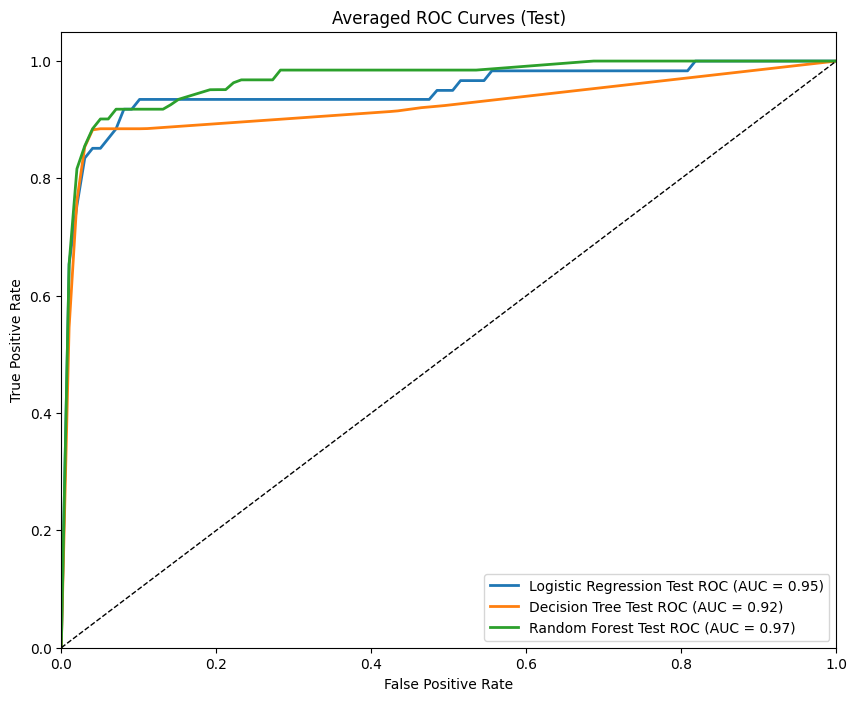

In [ ]:

from sklearn.metrics import roc_curve, auc


mean_fpr = np.linspace(0, 1, 100)  # common grid for interpolation

#dictionary to hold averaged ROC curve data for each model
roc_curves = {}

for name, model in models.items():
    tprs_test = []
    aucs_test = []

    #iterate through each fold
    for train_index, test_index in kfold.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        #apply SMOTE on the training fold
        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

        model.fit(X_train_smote, y_train_smote)

        #compute ROC curve for the test set of this fold
        y_test_proba = model.predict_proba(X_test_fold)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_fold, y_test_proba)
        fold_auc = auc(fpr, tpr)
        aucs_test.append(fold_auc)

        #interpolate TPR on the common grid
        tpr_interp = np.interp(mean_fpr, fpr, tpr)
        tpr_interp[0] = 0.0
        tprs_test.append(tpr_interp)

    #compute mean ROC curve over folds
    mean_tpr_test = np.mean(tprs_test, axis=0)
    mean_tpr_test[-1] = 1.0
    mean_auc_test = auc(mean_fpr, mean_tpr_test)

    roc_curves[name] = (mean_fpr, mean_tpr_test, mean_auc_test)

#plot the averaged ROC curves for each model
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f"{model_name} Test ROC (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Averaged ROC Curves (Test)")
plt.legend(loc="lower right")
plt.show()


1.Logistic Regression:

- Training ROC-AUC (0.9536): Indicates that on the training data, the model has a strong ability to correctly rank positive versus negative instances.
- Testing ROC-AUC (0.9501): The model generalizes very well to unseen data, maintaining excellent discrimination. The slight drop from training to testing is minimal, suggesting a stable and robust model.

2.Decision Tree:

- Training ROC-AUC (0.98): Reflects that the Decision Tree can effectively distinguish between classes on the training data, might be a sign that the tree is fitting the training data very closely too.
- Testing ROC-AUC (0.9219): This drop suggests that the Decision Tree may be overfitting to the training data and not generalizing as well to new, unseen examples.

3.Random Forest:

- Training ROC-AUC (0.9880): Demonstrates a very strong discriminative power on the training set, benefiting from the ensemble approach of combining multiple trees.
- Testing ROC-AUC (0.9697): Its performance on unseen data remains very high, indicating that it captures subtle patterns effectively without overfitting.


All three models show high ROC-AUC scores, indicating excellent ability to differentiate between classes, with Random Forest leading slightly in performance.

Without applying PCA

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

#features and target
X = df1[['beds', 'beds_covid', 'beds_noncrit', 'admitted_covid', 'admitted_total',
         'discharged_covid', 'discharged_total', 'hosp_covid', 'hosp_noncovid']]
y = df1['capacity_label']

#Stratified K-Fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


#pipelines for each model.
#the pipeline ensures the following steps in each fold:
# 1. Scale the features using StandardScaler
# 2. Apply SMOTE to the training data
# 3. Fit the classifier

models = {
    'Logistic Regression': ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', LogisticRegression(max_iter=1000, solver='lbfgs'))
    ]),
    'Decision Tree': ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=5))
    ]),
    'Random Forest': ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=3, max_features='sqrt'))
    ])
}

training_results = {}
testing_results = {}

#loop over each model and perform cross-validation
for name, pipeline_model in models.items():
    train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1-score': []}
    test_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1-score': []}

    #cross-validation loop
    for train_index, test_index in kfold.split(X, y):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        pipeline_model.fit(X_train, y_train)

        y_train_pred = pipeline_model.predict(X_train)
        y_test_pred = pipeline_model.predict(X_test)

        train_metrics['accuracy'].append(accuracy_score(y_train, y_train_pred))
        test_metrics['accuracy'].append(accuracy_score(y_test, y_test_pred))

        train_report = classification_report(y_train, y_train_pred, output_dict=True, zero_division=0)
        test_report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)

        for metric in ['precision', 'recall', 'f1-score']:
            train_metrics[metric].append(train_report['weighted avg'][metric])
            test_metrics[metric].append(test_report['weighted avg'][metric])

    # Aggregate metrics across folds
    training_results[name] = {
        'Accuracy': np.mean(train_metrics['accuracy']),
        'Precision': np.mean(train_metrics['precision']),
        'Recall': np.mean(train_metrics['recall']),
        'F1-Score': np.mean(train_metrics['f1-score'])
    }
    testing_results[name] = {
        'Accuracy': np.mean(test_metrics['accuracy']),
        'Precision': np.mean(test_metrics['precision']),
        'Recall': np.mean(test_metrics['recall']),
        'F1-Score': np.mean(test_metrics['f1-score'])
    }


In [ ]:

# Print aggregated training results
print("Training Results:")
for model_name, metrics in training_results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

# Print aggregated testing results
print("\nTesting Results:")
for model_name, metrics in testing_results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Training Results:

Logistic Regression:
Accuracy: 0.9726
Precision: 0.9846
Recall: 0.9726
F1-Score: 0.9763

Decision Tree:
Accuracy: 0.9383
Precision: 0.9772
Recall: 0.9383
F1-Score: 0.9517

Random Forest:
Accuracy: 0.9833
Precision: 0.9885
Recall: 0.9833
F1-Score: 0.9849

Testing Results:

Logistic Regression:
Accuracy: 0.9692
Precision: 0.9840
Recall: 0.9692
F1-Score: 0.9738

Decision Tree:
Accuracy: 0.9360
Precision: 0.9749
Recall: 0.9360
F1-Score: 0.9498

Random Forest:
Accuracy: 0.9772
Precision: 0.9832
Recall: 0.9772
F1-Score: 0.9792


1.Logistic Regression
- Consistently high performance with minimal gap between training and testing, indicating excellent generalization.

2.Decision Tree
- Slightly lower than Logistic Regression and Random Forest but very consistent between training and testing, suggesting a stable model though with a bit lower overall performance.

3.Random Forest
- The best overall performer with very high metrics and a small drop from training to testing, showing strong generalization and robust performance.


In [ ]:
#print out roc-auc score for each model

mean_fpr = np.linspace(0, 1, 100)

roc_curves = {}

for name, pipeline_model in models.items():
    tprs_train = []
    tprs_test = []
    aucs_train = []
    aucs_test = []

    for train_index, test_index in kfold.split(X, y):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        pipeline_model.fit(X_train, y_train)

        y_train_proba = pipeline_model.predict_proba(X_train)[:, 1]
        y_test_proba = pipeline_model.predict_proba(X_test)[:, 1]


        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
        fold_auc_train = auc(fpr_train, tpr_train)
        aucs_train.append(fold_auc_train)


        tpr_train_interp = np.interp(mean_fpr, fpr_train, tpr_train)
        tpr_train_interp[0] = 0.0
        tprs_train.append(tpr_train_interp)


        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
        fold_auc_test = auc(fpr_test, tpr_test)
        aucs_test.append(fold_auc_test)

        tpr_test_interp = np.interp(mean_fpr, fpr_test, tpr_test)
        tpr_test_interp[0] = 0.0
        tprs_test.append(tpr_test_interp)

    mean_tpr_train = np.mean(tprs_train, axis=0)
    mean_tpr_train[-1] = 1.0
    mean_auc_train = auc(mean_fpr, mean_tpr_train)

    mean_tpr_test = np.mean(tprs_test, axis=0)
    mean_tpr_test[-1] = 1.0
    mean_auc_test = auc(mean_fpr, mean_tpr_test)

    roc_curves[name] = {
        'train': (mean_fpr, mean_tpr_train, mean_auc_train),
        'test':  (mean_fpr, mean_tpr_test, mean_auc_test)
    }

    print(f"{name} - Training ROC-AUC: {mean_auc_train:.4f}, Testing ROC-AUC: {mean_auc_test:.4f}")


Logistic Regression - Training ROC-AUC: 0.9948, Testing ROC-AUC: 0.9941
Decision Tree - Training ROC-AUC: 0.9867, Testing ROC-AUC: 0.9725
Random Forest - Training ROC-AUC: 0.9939, Testing ROC-AUC: 0.9903


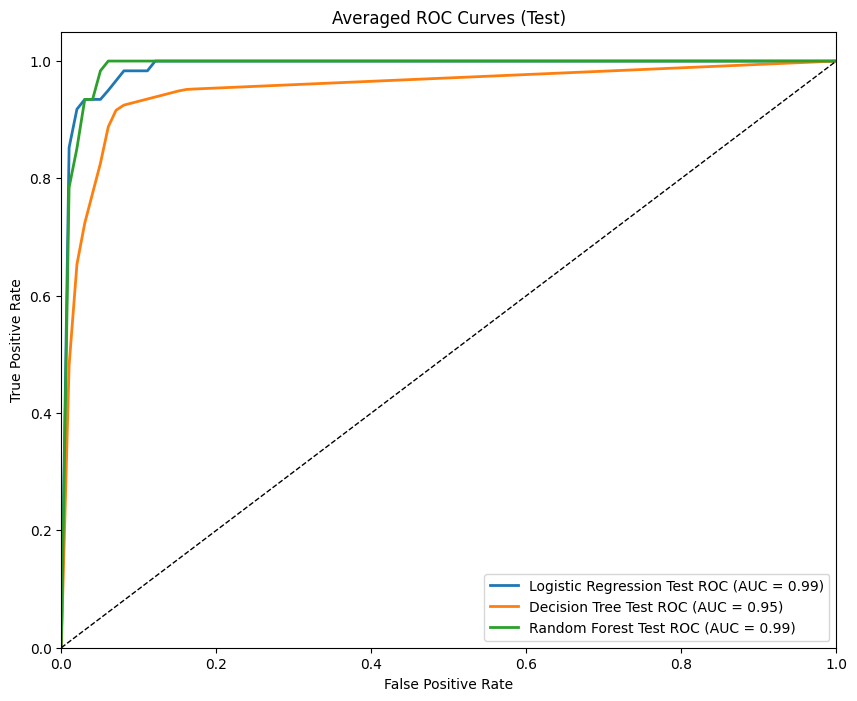

In [ ]:
#plot roc-auc graphs for each model
mean_fpr = np.linspace(0, 1, 100)

roc_curves = {}

for name, model in models.items():
    tprs_test = []
    aucs_test = []

    for train_index, test_index in kfold.split(X, y):

        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

        model.fit(X_train_smote, y_train_smote)

        y_test_proba = model.predict_proba(X_test_fold)[:, 1]

        fpr, tpr, _ = roc_curve(y_test_fold, y_test_proba)
        fold_auc = auc(fpr, tpr)
        aucs_test.append(fold_auc)

        tpr_interp = np.interp(mean_fpr, fpr, tpr)
        tpr_interp[0] = 0.0  #
        tprs_test.append(tpr_interp)


    mean_tpr_test = np.mean(tprs_test, axis=0)
    mean_tpr_test[-1] = 1.0
    mean_auc_test = auc(mean_fpr, mean_tpr_test)

    roc_curves[name] = (mean_fpr, mean_tpr_test, mean_auc_test)

# plot the averaged ROC curves for each model
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f"{model_name} Test ROC (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Averaged ROC Curves (Test)")
plt.legend(loc="lower right")
plt.show()


1.Logistic Regression:

- Training ROC-AUC (0.9948) and Testing ROC-AUC (0.9941): Nearly perfect discrimination. The minimal difference between training and testing shows excellent generalization.

2.Decision Tree:

- Training ROC-AUC (0.9867) and Testing ROC-AUC (0.9725): Very high scores, though the slight drop on testing suggests a bit more overfitting compared to the other models—but performance is still excellent.

3.Random Forest:

- Training ROC-AUC (0.9939) and Testing ROC-AUC (0.9903): Exceptionally high and consistent scores, indicating robust performance and very effective generalization.

### **MODEL COMPARISONS**

Although our PCA transformation with PC1 and PC2 retains about **90% of the cumulative variance**, the models trained using only these two components show lower performance compared to those using the full set of features. This indicates that-even though the top two components capture most of the variance-the remaining 10% (or the additional features) still contribute valuable discriminative information for classification.

| Model               | Setting      | Train Accuracy | Test Accuracy | Train ROC-AUC | Test ROC-AUC |
|---------------------|--------------|----------------|---------------|---------------|--------------|
| Logistic Regression | With PCA     | 0.9128         | 0.9103        | 0.9536        | 0.9501       |
| Logistic Regression | Without PCA  | 0.9726         | 0.9692        | 0.9948        | 0.9941       |
| Decision Tree       | With PCA     | 0.9183         | 0.9103        | 0.9800        | 0.9219       |
| Decision Tree       | Without PCA  | 0.9383         | 0.9360        | 0.9867        | 0.9725       |
| Random Forest       | With PCA     | 0.9550         | 0.9526        | 0.9880        | 0.9697       |
| Random Forest       | Without PCA  | 0.9833         | 0.9772        | 0.9939        | 0.9903       |

**Key Takeaways:**

- **Logistic Regression:** Without PCA, the model achieves about 97% accuracy and nearly perfect ROC-AUC scores, while using PC1 and PC2 leads to approximately 91% accuracy and a slight drop in ROC-AUC.
- **Decision Tree:** The full feature set yields a test ROC-AUC of 0.9725 compared to 0.9219 with PCA, indicating that the additional features help reduce overfitting.
- **Random Forest:** Although performance is high in both cases, using the complete set of features further improves the ROC-AUC (from 0.9697 with PCA to 0.9903 without PCA).

Thus, even though the two principal components capture 90% of the variance, the remaining variance (and the additional features) appear to provide important discriminative power that enhances the models’ performance.




**Contribution of Analysis:**

1. Forecasting hospital bed demand: By predicting hospital capacity, the analysis enables better planning for COVID-19 surges, helping hospitals prepare for periods of overcapacity.

2. Optimizing resource allocation: By knowing when a hospital is nearing overcapacity, resources like staff, equipment, and beds can be allocated more effectively.

3. Proactive decision-making: With predictive insights, healthcare administrators can take actions ahead of time, such as reallocating resources, or seeking additional support, minimizing the risk of overwhelming the healthcare system.

## **References**

Dataset Source : Ministry of Health Malaysia's public COVID-19 database (https://github.com/MoH-Malaysia/covid19-public/blob/main/epidemic/hospital.csv)


